In [230]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


# 1. Introduction


- In this project, we are required to do a regression analysis using cross validation technique on a public dataset which has 205 observations and 26 attributes. The dataset can be found online the UC Irvine machine learning archive(https://archive.ics.uci.edu/ml/datasets/Automobile). 



- Here, the goal is to predict the weight of a passenger vehicle using different attributes as independent variables to the linear regression model.

# 2. Exploratory Data Analysis 

#### Read dataset from my github  repo and creat pandas dataframe

In [226]:
# Downloading the csv file from my GitHub repo
data_url = "https://raw.githubusercontent.com/mahletbirku/-DAV-6150/main/M2_Data.csv" 
auto_df = pd.read_csv(data_url, header=None)
auto_df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


#### Create pandas dataframe with attributes

In [227]:
attributes=['symboling', 'normalized-losses', 'make', 'fuel','aspiration','num-of-doors', 'body-style', 'drive-wheels','engine-location'
,'wheel-base','length', 'width', 'height', 'curb-weight' ,'engine-type', 'num-of-cylinders', 'engine-size','fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

In [228]:
auto_df.columns=attributes

In [229]:
auto_df

,symboling,normalized-losses,make,fuel,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


**As stated in the assignmnet, the 'curb weight' will be the dependent variable for the linear regression. As such, I swapped 'prce' column with 'curb weight' column so that the target variable will be the last column.**

In [169]:
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df

In [170]:
auto_df=swap_columns(auto_df, 'curb-weight', 'price')

In [171]:
auto_df

,symboling,normalized-losses,make,fuel,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,curb-weight
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,2548
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,2548
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,2823
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,2337
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,2824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,2952
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,3049
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,3012
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,3217


In [172]:
auto_df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'price', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'curb-weight'],
      dtype='object')

#### Create new DataFrame from existing DataFrame


In [173]:
auto_df = auto_df[['height', 'width', 'length', 'wheel-base',
'engine-size', 'horsepower', 'peak-rpm','city-mpg', 'curb-weight']].copy()

auto_df

,height,width,length,wheel-base,engine-size,horsepower,peak-rpm,city-mpg,curb-weight
0,48.8,64.1,168.8,88.6,130,111,5000,21,2548
1,48.8,64.1,168.8,88.6,130,111,5000,21,2548
2,52.4,65.5,171.2,94.5,152,154,5000,19,2823
3,54.3,66.2,176.6,99.8,109,102,5500,24,2337
4,54.3,66.4,176.6,99.4,136,115,5500,18,2824
...,...,...,...,...,...,...,...,...,...
200,55.5,68.9,188.8,109.1,141,114,5400,23,2952
201,55.5,68.8,188.8,109.1,141,160,5300,19,3049
202,55.5,68.9,188.8,109.1,173,134,5500,18,3012
203,55.5,68.9,188.8,109.1,145,106,4800,26,3217


**The explanatory variables you may choose from are as follows: height, width, length, wheel-base,
engine-size, horsepower, peak-rpm, and city-mpg.**

#### Let's check if there is a missing value

In [174]:
auto_df.isna().sum()

height         0
width          0
length         0
wheel-base     0
engine-size    0
horsepower     0
peak-rpm       0
city-mpg       0
curb-weight    0
dtype: int64

#### Let's get some of the basic statistics of the automobile data.

- From the table above, for each feature we can get the mean, standard deviation, count, and other basic information that can tell about the data.

In [175]:
auto_df.describe()

,height,width,length,wheel-base,engine-size,city-mpg,curb-weight
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,53.724878,65.907805,174.049268,98.756585,126.907317,25.219512,2555.565854
std,2.443522,2.145204,12.337289,6.021776,41.642693,6.542142,520.680204
min,47.800000,60.300000,141.100000,86.600000,61.000000,13.000000,1488.000000
25%,52.000000,64.100000,166.300000,94.500000,97.000000,19.000000,2145.000000
50%,54.100000,65.500000,173.200000,97.000000,120.000000,24.000000,2414.000000
75%,55.500000,66.900000,183.100000,102.400000,141.000000,30.000000,2935.000000
max,59.800000,72.300000,208.100000,120.900000,326.000000,49.000000,4066.000000


**Here, we have 205 counts, for all the  attributes for the final analysis. The response varibale is 'curb-weight'**

#### Let's create the default pairplot just to see how each features looks like


In [176]:
auto_df

,height,width,length,wheel-base,engine-size,horsepower,peak-rpm,city-mpg,curb-weight
0,48.8,64.1,168.8,88.6,130,111,5000,21,2548
1,48.8,64.1,168.8,88.6,130,111,5000,21,2548
2,52.4,65.5,171.2,94.5,152,154,5000,19,2823
3,54.3,66.2,176.6,99.8,109,102,5500,24,2337
4,54.3,66.4,176.6,99.4,136,115,5500,18,2824
...,...,...,...,...,...,...,...,...,...
200,55.5,68.9,188.8,109.1,141,114,5400,23,2952
201,55.5,68.8,188.8,109.1,141,160,5300,19,3049
202,55.5,68.9,188.8,109.1,173,134,5500,18,3012
203,55.5,68.9,188.8,109.1,145,106,4800,26,3217


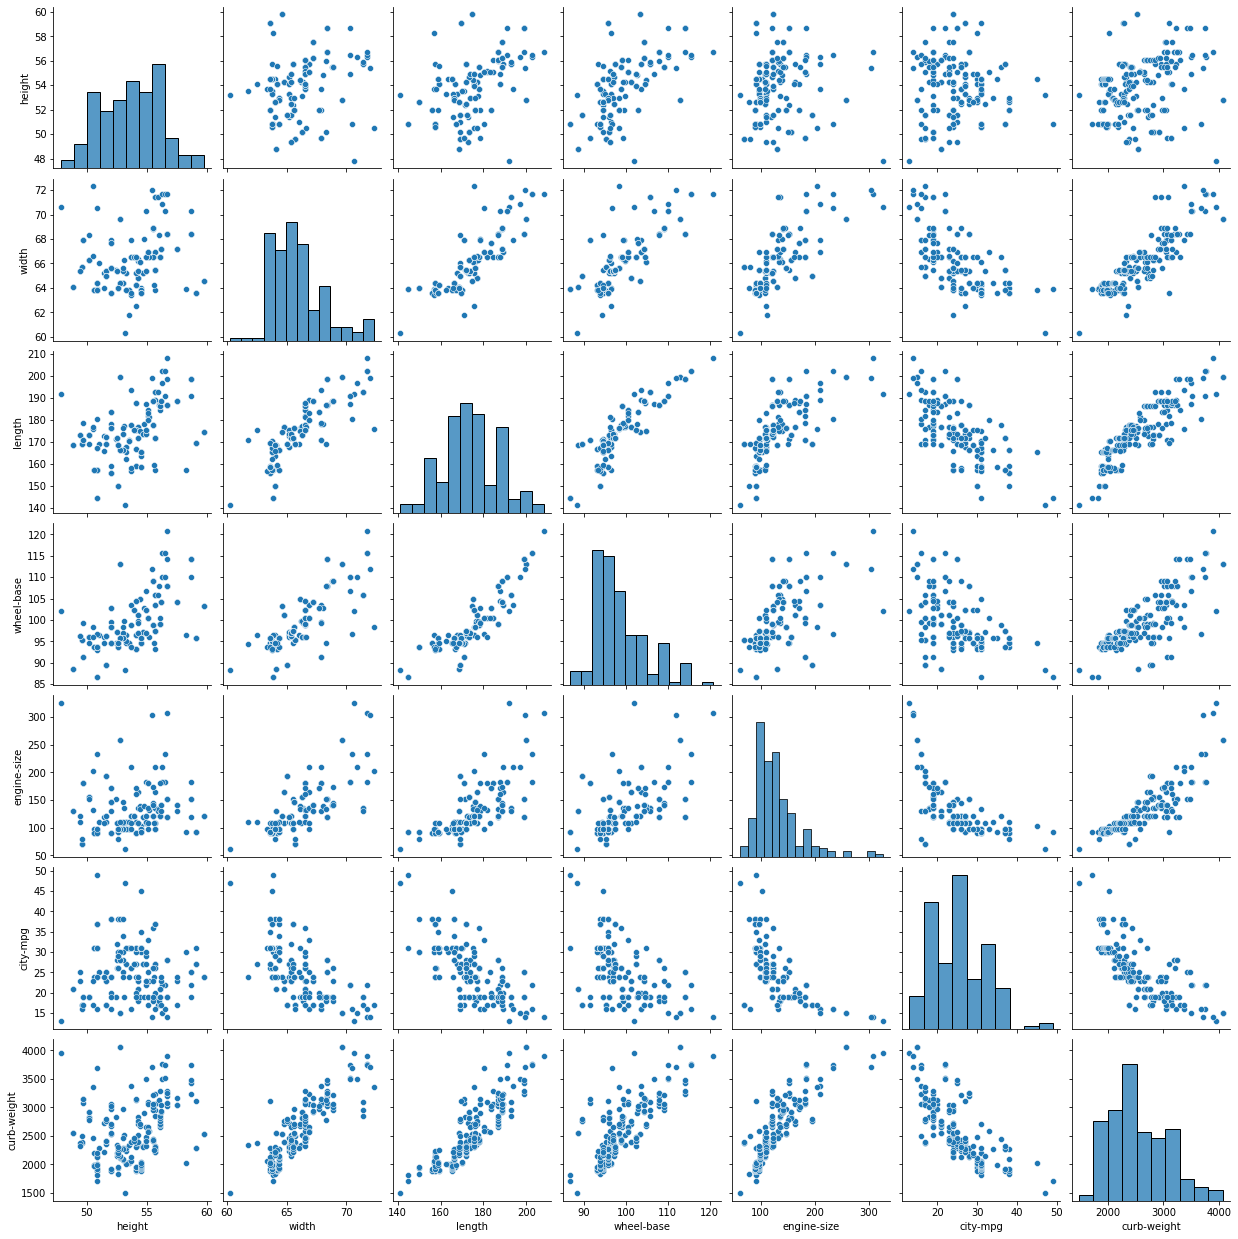

In [177]:
# Seaborn visualization library
import seaborn as sns

sns.pairplot(auto_df)

- The above plot is part of the explanatory data anlysis approach just to see what each feature looks like with eachother and in regard to the output(labeled) data.
 
### Now lets extract the last row to see how the scatter plot for all the features vs output( curb-weight ) 

In [178]:
auto_df.columns

Index(['height', 'width', 'length', 'wheel-base', 'engine-size', 'horsepower',
       'peak-rpm', 'city-mpg', 'curb-weight'],
      dtype='object')

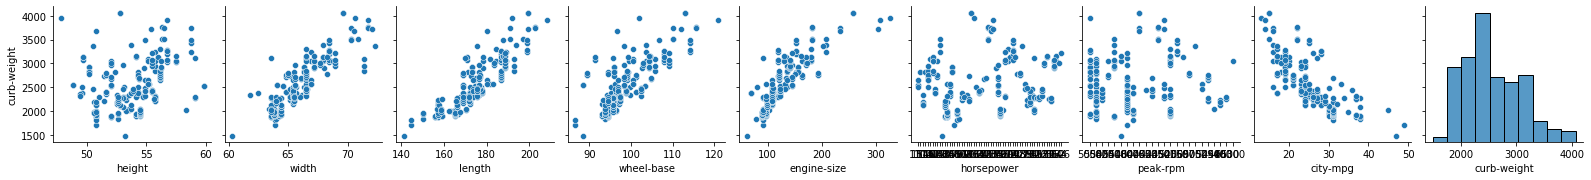

In [179]:
scatter_features = sns.pairplot(auto_df, x_vars = auto_df.columns, y_vars=["curb-weight"])

**From the above plots, we can see that height, width , length , wheel-base and engine size has higher linear **

### Correlation Matrix to see the correlation between the features and target output(curb-weight)

- A correlation matrix is a table showing correlation coefficients between variables

In [180]:
import seaborn as sns

correlation = auto_df.corr()
correlation


,height,width,length,wheel-base,engine-size,city-mpg,curb-weight
height,1.000000,0.279210,0.491029,0.589435,0.067149,-0.048640,0.295572
width,0.279210,1.000000,0.841118,0.795144,0.735433,-0.642704,0.867032
length,0.491029,0.841118,1.000000,0.874587,0.683360,-0.670909,0.877728
wheel-base,0.589435,0.795144,0.874587,1.000000,0.569329,-0.470414,0.776386
engine-size,0.067149,0.735433,0.683360,0.569329,1.000000,-0.653658,0.850594
city-mpg,-0.048640,-0.642704,-0.670909,-0.470414,-0.653658,1.000000,-0.757414
curb-weight,0.295572,0.867032,0.877728,0.776386,0.850594,-0.757414,1.000000


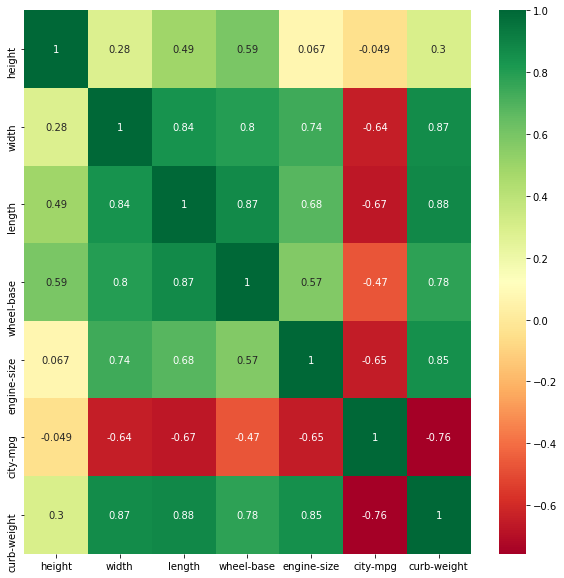

In [181]:
plt.subplots(figsize=(10,10))
sns.heatmap(correlation,cmap= 'RdYlGn',annot=True)
plt.show()

- From the above matrix, we can see that coefficients ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.



- From the above graph, the variable "length" got the hightest postive correlation with the response variable('curb-weight') which is 0.88. Except 'city-mpg', all the other vraibles have postive correlation with the response variable( 'curb-weight').

# 3. Regression Model Construction & Evaluation 

### Model 1: Multi-Variable Linear Regression using "width", "length", and "engine-size"

- Here, based on the correlation analysis I did above, I used 3 varibles such as "width", "length", and "engine-size" as independent variables and the target variable as 'curb-weight'. These 3 independent variables have the highets 3 correlation score with the response variable. 

#### Define predictor and response variables

In [200]:
x = auto_df[["width", "length", "engine-size"]]
y = auto_df['curb-weight']

#### Build Model 1


- Here, I used 5 fold cross validation, where the first fold is treated as a test set, and the model is fit on the remaining k − 1 folds.

- Here, the cross_val_score from sklearn calculates the R squared metric for the applied model. R squared error close to 1 implies a better fit and less error.

In [201]:
#build multiple linear regression model
model_1 = LinearRegression()
average_score=np.mean(cross_val_score(model_1, x, y, cv=5))
average_score

0.844663455252137

**From the above, we can observe that using 5 fold cross validation, the R squared metric value turned out to be 0.845. For this experiment, I used three variables such as "width", "length", and "wheel-base" as the have the highest correlation score with the  target variable which is 'curb-weight'.**

### Model 2: Multi-Variable Linear Regression using "width", "length", "engine-size", and  "wheel-base"


- Here, based on the correlation analysis I did above, I used 4 varibles such as "width", "length", "engine-size", and "wheel-base" as independent variables and the target variable as 'curb-weight'. These 4 independent variables have the highets 4 correlation scores with the response variable. 

#### Define predictor and response variables

In [208]:
x = auto_df[["width", "length", "engine-size", "wheel-base" ]]
y = auto_df['curb-weight']

#### Build Model 2


- Here, I used 5 fold cross validation, where the first fold is treated as a test set, and the model is fit on the remaining k − 1 folds.

- Here, the cross_val_score from sklearn calculates the R squared metric for the applied model. R squared error close to 1 implies a better fit and less error.

In [209]:
#build multiple linear regression model
model_2 = LinearRegression()
average_score=np.mean(cross_val_score(model_2, x, y, cv=5))
average_score

0.8413083040997126

**From the above, we can observe that using 5 fold cross validation, the R squared metric value turned out to be 0.841 which is slightly lower than that of Model 1. For this experiment, I used four variables such as "width", "length", "engine-size", and "wheel-base" as the have the top 4 correlation scores with the  target variable which is 'curb-weight'.**

### Model 3: Multi-Variable Linear Regression using "height", "width", "length", "engine-size", and  "wheel-base"


- Here, based on the correlation analysis I did above, I used 4 varibles such as "height", "width", "length", "engine-size", and "wheel-base" as independent variables and the target variable as 'curb-weight'. These 5 independent variables have the highets 5 correlation scores with the response variable. 

#### Define predictor and response variables

In [210]:
x = auto_df[["height","width", "length", "engine-size", "wheel-base"]]
y = auto_df['curb-weight']

#### Build Model 3

- Here, I used 5 fold cross validation, where the first fold is treated as a test set, and the model is fit on the remaining k − 1 folds.

- Here, the cross_val_score from sklearn calculates the R squared metric for the applied model. R squared error close to 1 implies a better fit and less error.

In [211]:
#build multiple linear regression model
model_3 = LinearRegression()
average_score=np.mean(cross_val_score(model_3, x, y, cv=5))
average_score

0.8179727037894178

**From the above, we can observe that using 5-fold cross validation, the R squared metric value turned out to be 0.818 which is the lowest out of all the models. For this experiment, I used five variables such as "height", "width", "length", "engine-size", and "wheel-base" as the have the top 5 correlation scores with the target variable which is 'curb-weight'.**

# 4.Conclusions 


- In conclusion, I built 3 linear regression models using different combinations of predictor variables based on the correlation analysis I did as part of the EDA.

- Model 1 achieved the highest R squared value which is 0.845 whereas Model 3 got the lowest R squared value of 0.818. Model 1 consists of 3 predictor values such as "width", "length", and "engine-size". These variables have the top 3 correlation sore with the response variable which is 'curb-weight'.

- Thus, I would prefer model 1 as it acheived the hightest R squared value.